In [2]:
import pandas as pd 
import numpy as np 
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv("datasets/Yearly_revenue.csv")

In [5]:
df.head(5)

,Yearly_revenue
0,3307
1,3556
2,3601
3,3721
4,4036


In [11]:
# generating time column here 

years = range(1975,1975+len(df))

df["Date"] = pd.to_datetime([f'{year}-01-01' for year in years])
df.head()

,Yearly_revenue,Date
0,3307,1975-01-01
1,3556,1976-01-01
2,3601,1977-01-01
3,3721,1978-01-01
4,4036,1979-01-01


In [22]:
df.set_index(df["Date"],inplace=True)
df.drop(columns=["Date"],inplace=True)

In [23]:
df.head()

,Yearly_revenue
Date,
1975-01-01,3307
1976-01-01,3556
1977-01-01,3601
1978-01-01,3721
1979-01-01,4036


<Axes: xlabel='Date', ylabel='Yearly_revenue'>

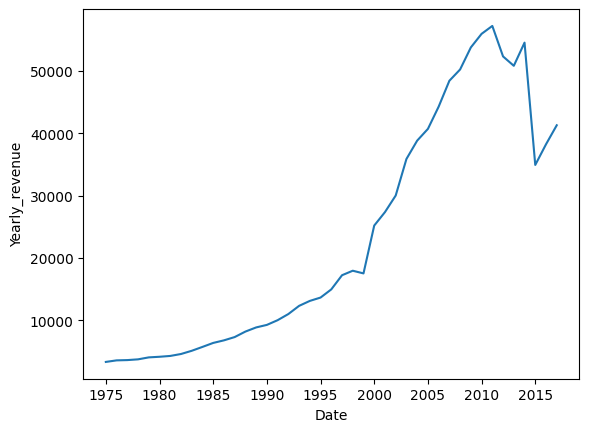

In [30]:
import seaborn as sns
sns.lineplot(df["Yearly_revenue"])

# Decomposing the Time Series 

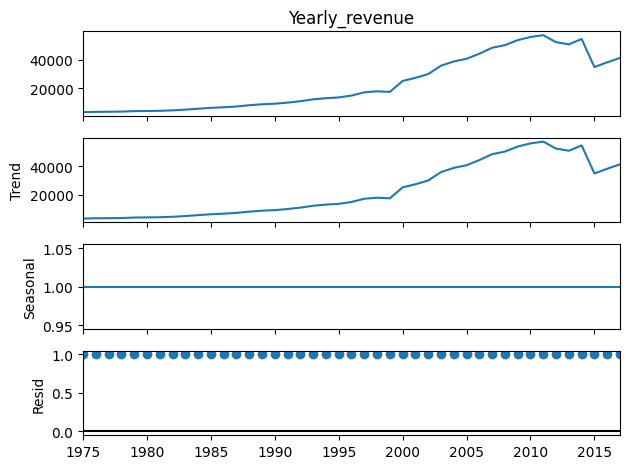

In [28]:
sd = seasonal_decompose(df["Yearly_revenue"],model="multiplicative")
sd.plot()
plt.show()

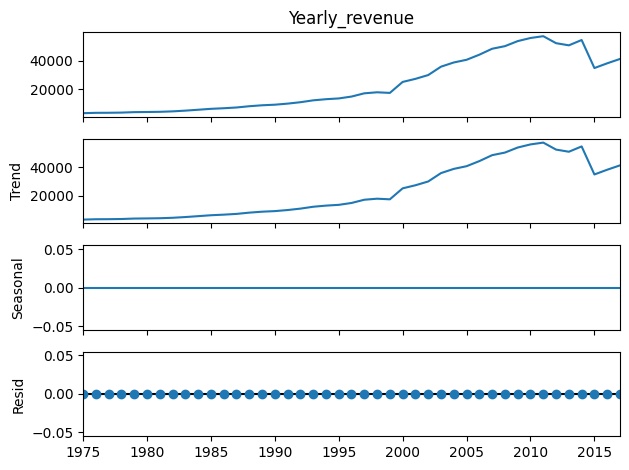

In [29]:
asd = seasonal_decompose(df["Yearly_revenue"],model="additive")
asd.plot()
plt.show()

We conclude by looking at plots that residual in additive model are independent of each other and they seem correlated in multiplicative model

there is a increasing trend along with no seasonality in the column

In [36]:
# ADF test
from statsmodels.tsa.stattools import adfuller
adf = adfuller(df["Yearly_revenue"])
adf[1]

0.6657166727999064

p-value is greater then 0.05 means we fail to reject null hypothesis and hence state that series is non-stationary

In [39]:
# kpss test 
from statsmodels.tsa.stattools import kpss
kpss = kpss(df["Yearly_revenue"])
kpss[1]

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1451/304681582.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss = kpss(df["Yearly_revenue"])


0.01

p-value is less then 0.05 and hence we reject null hypothesis and state that series is non-stationary

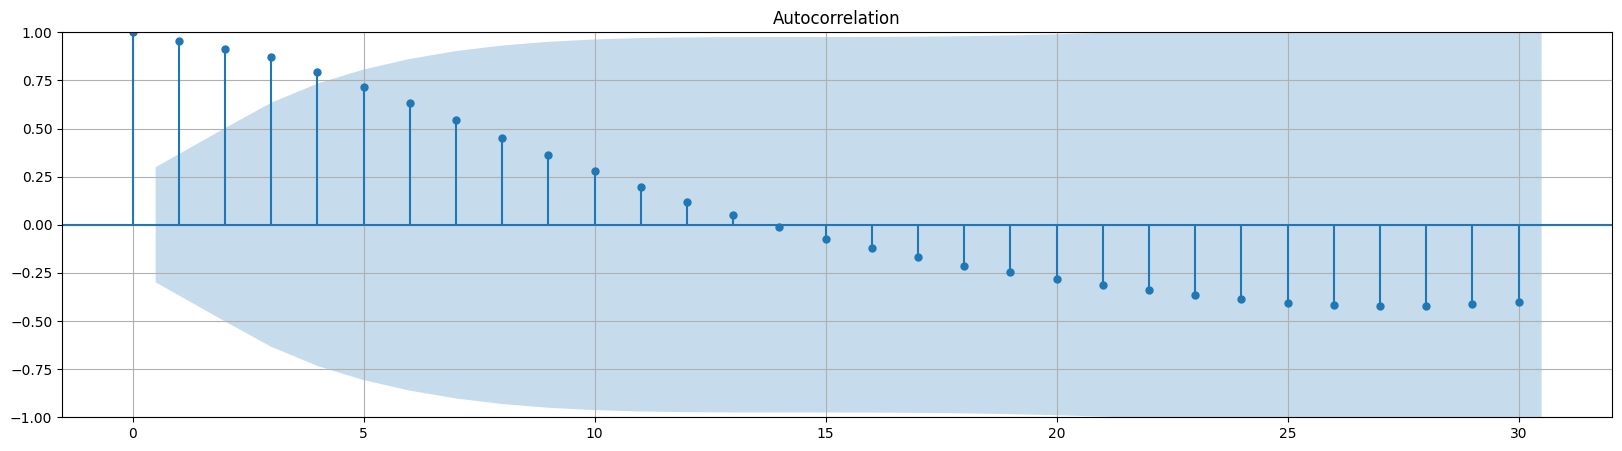

In [38]:
# ACF plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(20,5))
plt.grid()
plot_acf(df["Yearly_revenue"],ax=plt.gca(), lags=30)
plt.show()

There is a seasonal pattern amoung lags 

# First order non-seasonal differencing

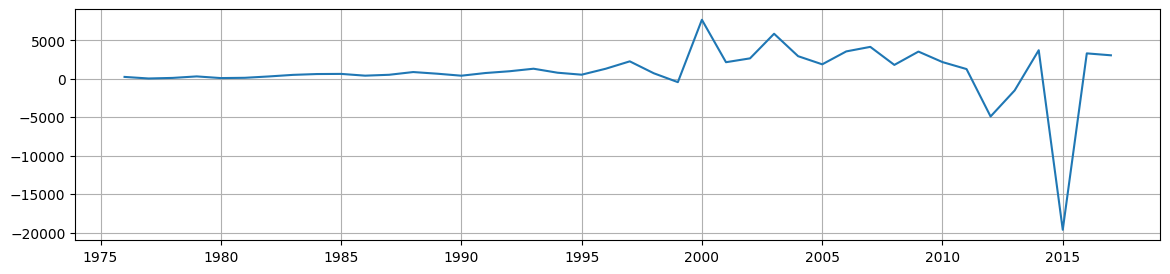

In [34]:
diff = df["Yearly_revenue"].diff().dropna()   # TRYING TO MAKE DATA TREND STATIONARY
plt.figure(figsize=(14, 3))
plt.grid()
plt.plot(diff)
plt.show()

In [41]:
# ADF test
from statsmodels.tsa.stattools import adfuller
diff_adf = adfuller(diff)
diff_adf[1]

0.24903991313852786

p-value still greater then 0.05 thus we fail to reject null hypothesis and state that the series is non-stationary

In [42]:
# kpss test 
from statsmodels.tsa.stattools import kpss
diff_kpss = kpss(diff)
diff_kpss[1]

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1451/3270517482.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  diff_kpss = kpss(diff)


0.1

p-value is greater then 0.05 thus we fail to reject null-hypothesis which states that the series is stationary

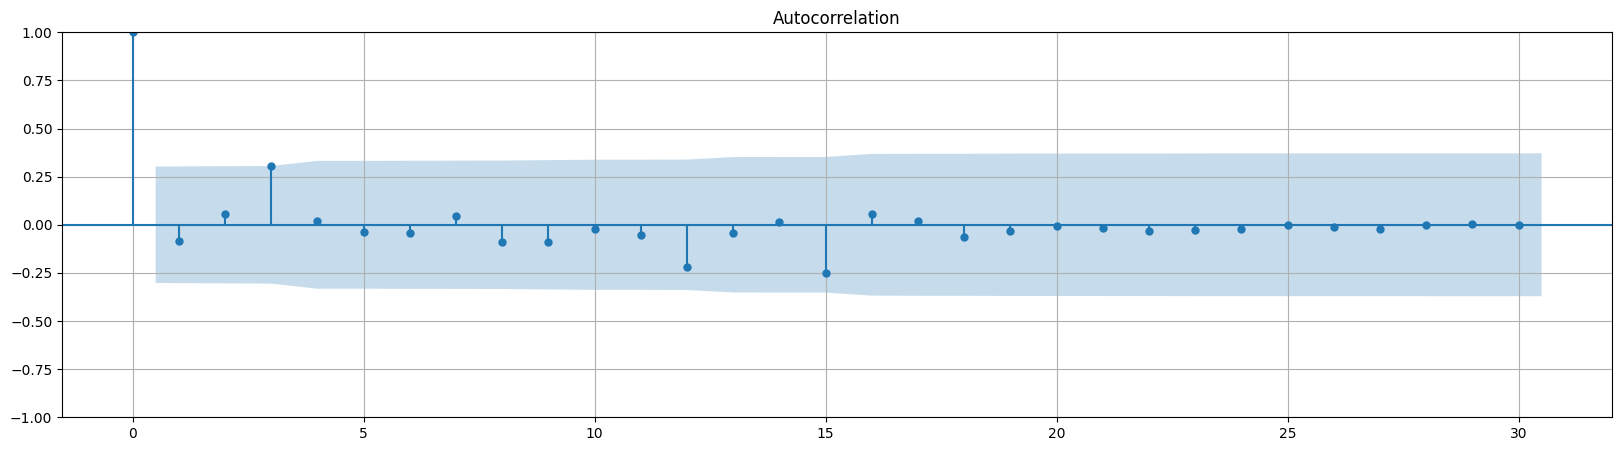

In [44]:
# ACF plot of first order non-seasonal differencing
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(20,5))
plt.grid()
plot_acf(diff,ax=plt.gca(), lags=30)
plt.show()

# Second order non-seasonal differencing

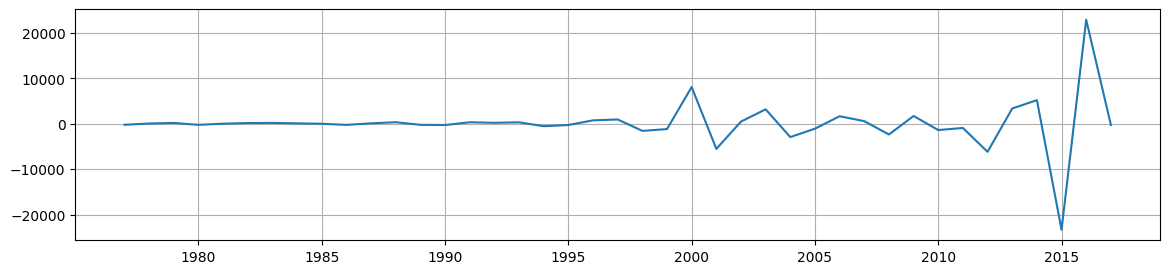

In [45]:
diff2 = df["Yearly_revenue"].diff().diff().dropna()   # TRYING TO MAKE DATA TREND STATIONARY
plt.figure(figsize=(14, 3))
plt.grid()
plt.plot(diff2)
plt.show()

In [46]:
# ADF test
diff2_adf = adfuller(diff2)
diff2_adf[1]

0.7224364779199974

p-value is greater then 0.05 hence we fail to reject null hypo and state that series is non-stationary

In [48]:
# kpss test 
diff2_kpss = kpss(diff2)
diff2_kpss[1]

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1451/2026669970.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  diff2_kpss = kpss(diff2)


0.1

p-value is greater then 0.05 thus we fail to reject null-hypothesis which states that the series is stationary

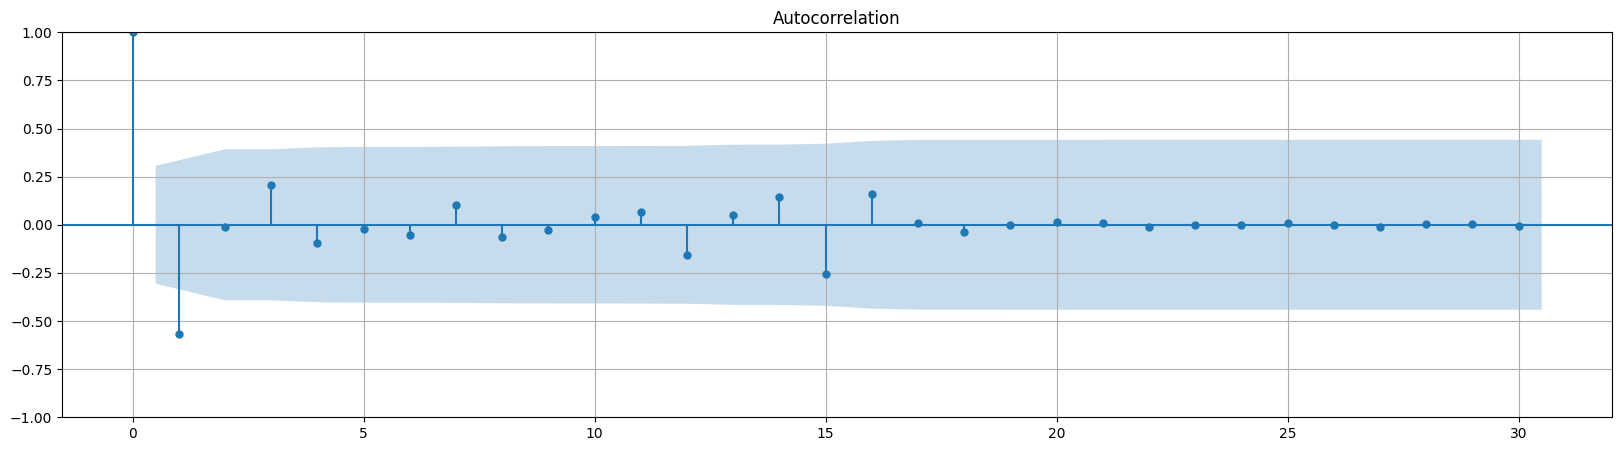

In [49]:
# ACF plot of second order non-seasonal differencing

plt.figure(figsize=(20,5))
plt.grid()
plot_acf(diff2,ax=plt.gca(), lags=30)
plt.show()

It has no seasonal component and thus we cannot seasoanl_difference it 

will go for third order differencing

# Third order non-seasonal differencing

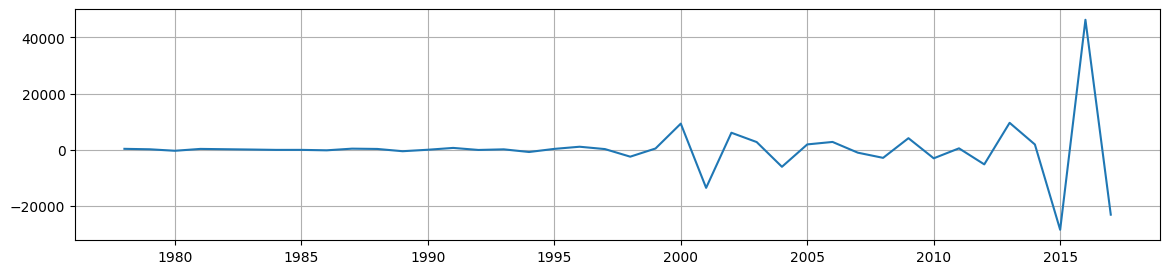

In [50]:
diff3 = df["Yearly_revenue"].diff().diff().diff().dropna()   # TRYING TO MAKE DATA TREND STATIONARY
plt.figure(figsize=(14, 3))
plt.grid()
plt.plot(diff3)
plt.show()

In [51]:
# ADF test
diff3_adf = adfuller(diff3)
diff3_adf[1]

6.4795699187262e-16

p-value is less then 0.05 means we reject null hypothesis and state that the series is now stationary

In [52]:
# kpss test 
diff3_kpss = kpss(diff3)
diff3_kpss[1]

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1451/812033837.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  diff3_kpss = kpss(diff3)


0.1

p-value is greater then 0.05 means wwe fail to reject null hypothesis and state that the series is stationary

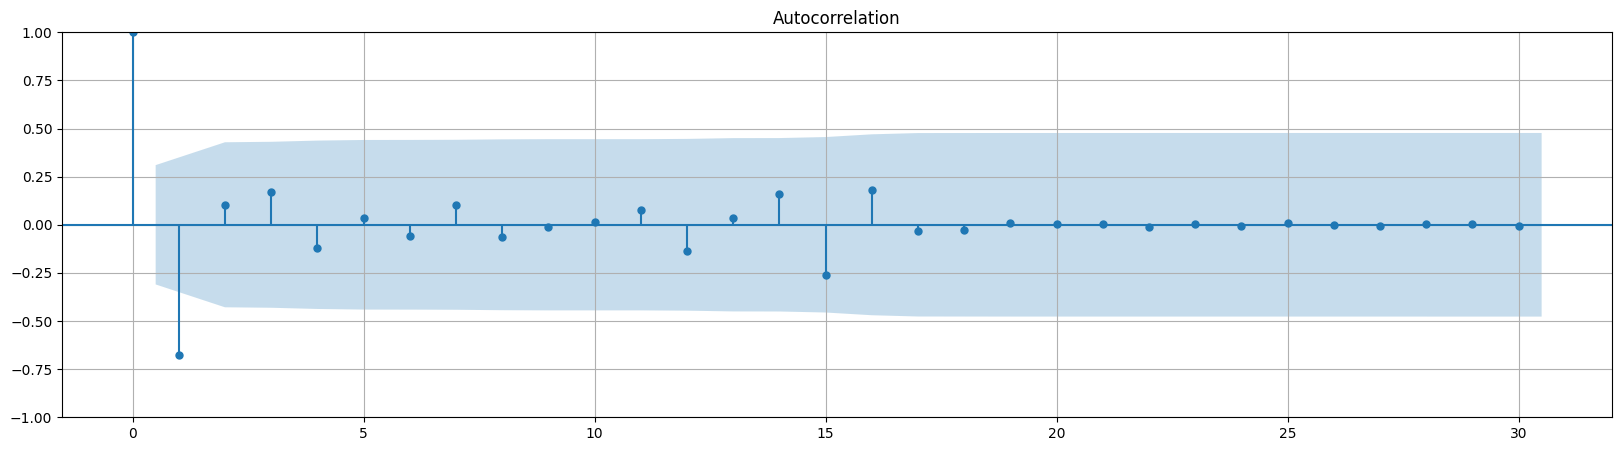

In [53]:
# ACF plot of second order non-seasonal differencing

plt.figure(figsize=(20,5))
plt.grid()
plot_acf(diff3,ax=plt.gca(), lags=30)
plt.show()

# here only on lag is out of the significant region and hence we can assume that the series is stationary althought statistical tests are preffered more over graphical representation.

# Lets work on elctric dataset

In [89]:
df = pd.read_csv("datasets/Electric_Production (1).csv")

In [90]:
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [91]:
df["DATE"].dtype

dtype('O')

In [92]:
df["DATE"] = pd.to_datetime(df["DATE"], format='%m/%d/%Y') # the date is in the format m-d-y

df.index = df["DATE"].dt.strftime('%d - %m - %Y')

df.drop(columns=["DATE",],inplace=True)

In [93]:
df.head()

,IPG2211A2N
DATE,
01 - 01 - 1985,72.5052
01 - 02 - 1985,70.6720
01 - 03 - 1985,62.4502
01 - 04 - 1985,57.4714
01 - 05 - 1985,55.3151


[]

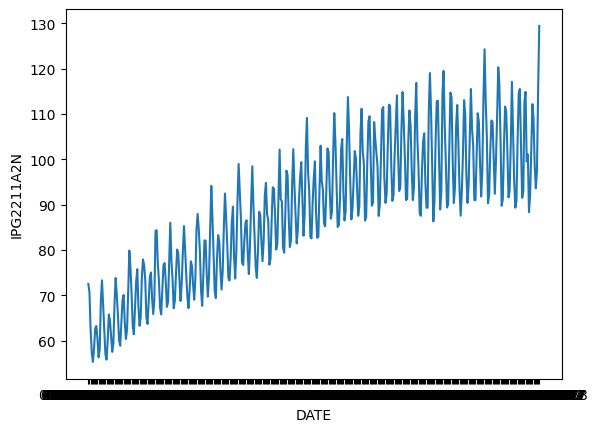

In [94]:
sns.lineplot(df["IPG2211A2N"])
plt.plot()

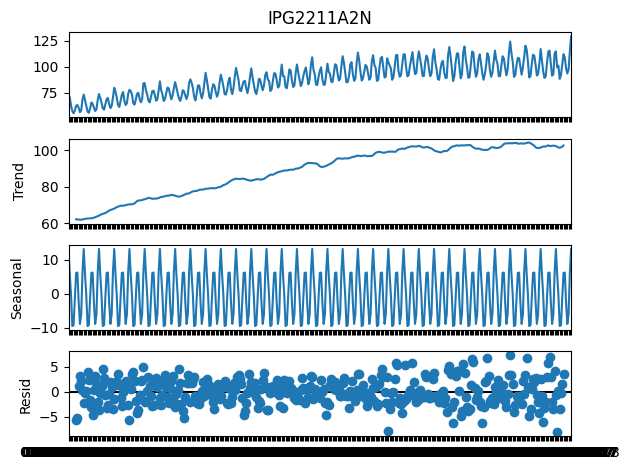

In [95]:
result = seasonal_decompose(df["IPG2211A2N"],model="additive",period=12)
result.plot()
plt.show()

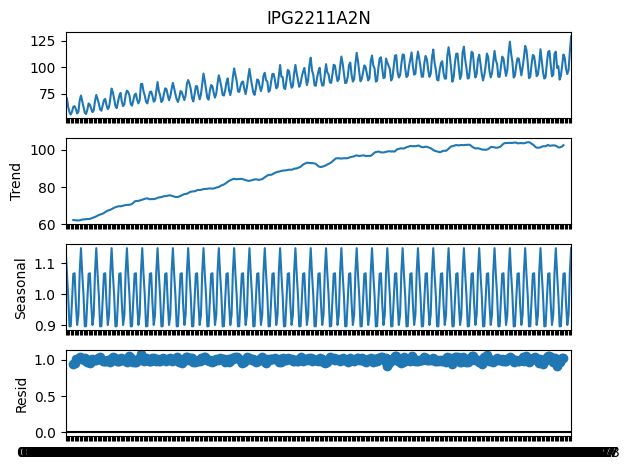

In [96]:
result = seasonal_decompose(df["IPG2211A2N"],model="multiplicative",period=12)
result.plot()
plt.show()

additive seems better since residuals are scattered near zero and are not correlated

In [97]:
# ADF test
adf = adfuller(df["IPG2211A2N"])
adf[1]

0.18621469116586792

p-value greater then 0.05 means we fail to reject null-hypothesis and hence we say that the series is non-stationary

In [100]:
from statsmodels.tsa.stattools import kpss
# kpss test
kpss = kpss(df["IPG2211A2N"])
kpss[1]

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1451/4001387160.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss = kpss(df["IPG2211A2N"])


0.01

p-value is less then 0.05 means we reject null hypothesis and state that series is non-stationary

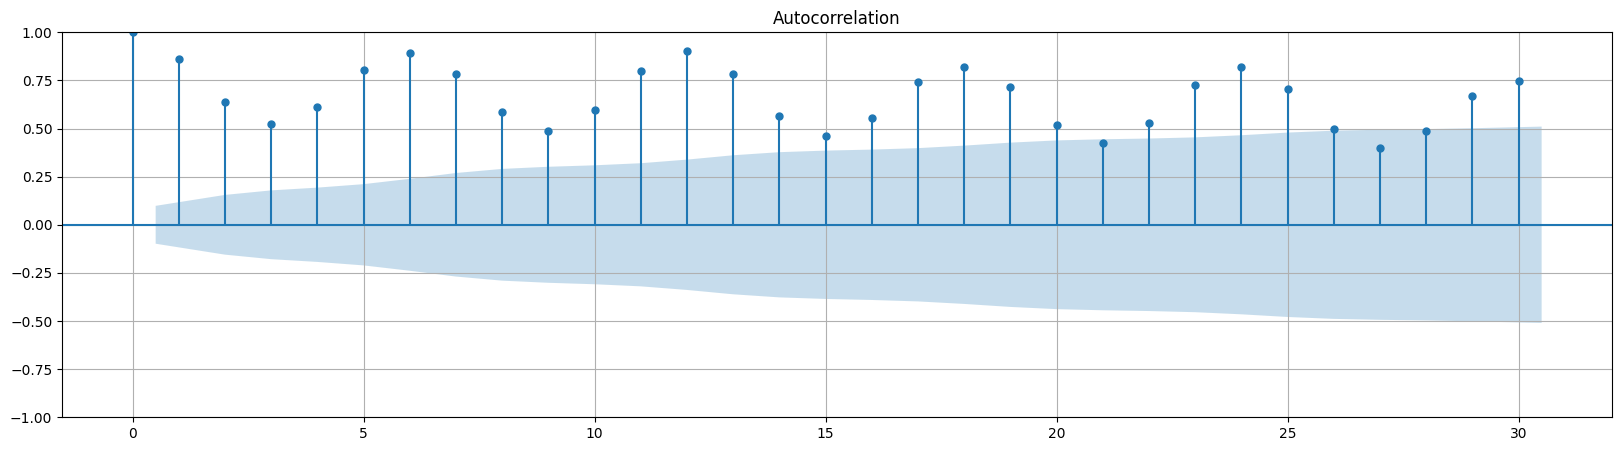

In [101]:
# ACF plot 
plt.figure(figsize=(20,5))
plt.grid()
plot_acf(df["IPG2211A2N"],ax=plt.gca(), lags=30)
plt.show()

This shows there is a seasonal pattern in the series

# First order non-seasonal differencing

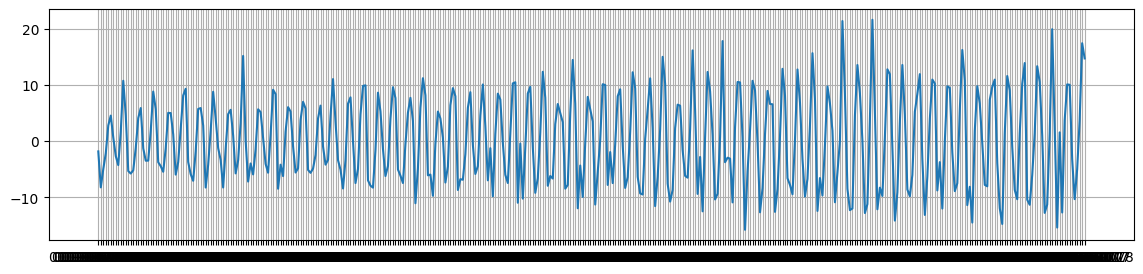

In [109]:
diff = df['IPG2211A2N'].diff().dropna()     # TRYING TO MAKE DATA TREND STATIONARY
plt.figure(figsize=(14, 3))
plt.grid()
plt.plot(diff)
plt.show()

In [110]:
# ADF test
diff_adf = adfuller(diff)
diff_adf[1]

4.077786565540049e-10

p-value is less then 0.05 and hence we reject null hypothesis thus series is stationary now 

In [111]:
# kpss test
from statsmodels.tsa.stattools import kpss
diff_kpss = kpss(diff)
diff_kpss[1]

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1451/1543594210.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  diff_kpss = kpss(diff)


0.1

p-value is greater then 0.05 and hence we fail to reject null hypothesis thus series is stationary

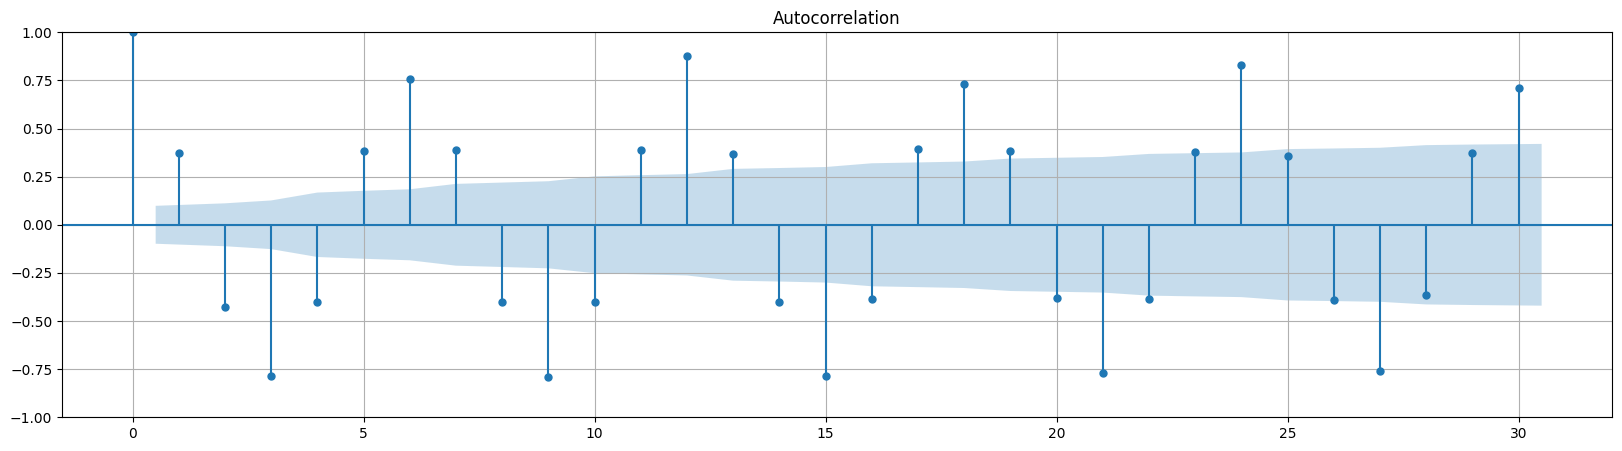

In [112]:
plt.figure(figsize=(20, 5))
plt.grid()
plot_acf(diff, ax=plt.gca(), lags =30) 
plt.show()

# Second order non-seasonal differencing 

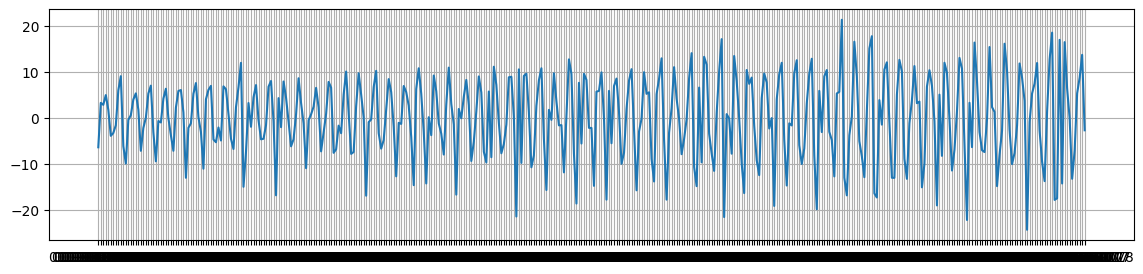

In [113]:
diff2 = df['IPG2211A2N'].diff().diff().dropna()     # TRYING TO MAKE DATA TREND STATIONARY
plt.figure(figsize=(14, 3))
plt.grid()
plt.plot(diff2)
plt.show()

In [116]:
# adf test
diff2_adf = adfuller(diff2)
diff2_adf[1]

4.183693747997204e-17

p-value is less then 0.05 and hence we reject null hypothesis thus series is stationary now 

In [117]:

# kpss test
diff2_kpss = kpss(diff2)
diff2_kpss[1]

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1451/2106959162.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  diff2_kpss = kpss(diff2)


0.1

p-value is greater then 0.05 and hence we fail to reject null hypothesis thus series is stationary

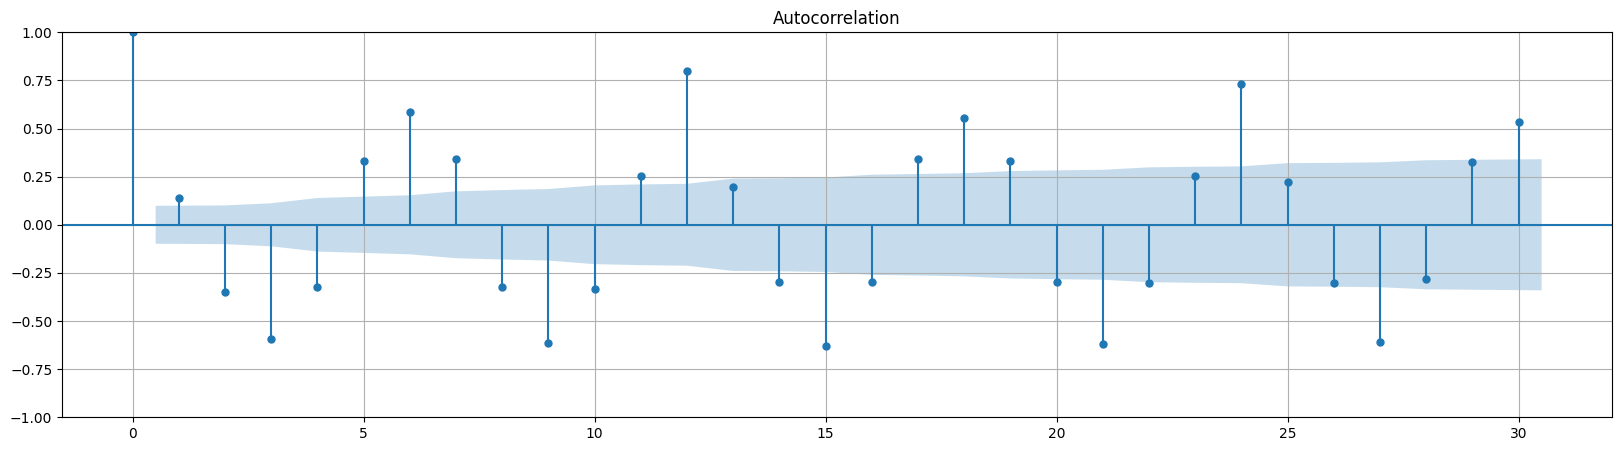

In [118]:
# acf plot of second order non-seasonal differencing
plt.figure(figsize=(20, 5))
plt.grid()
plot_acf(diff2 , ax=plt.gca(), lags =30 )
plt.show()

Series has some seasonal pattern 

# First order Seasonal Differencing 

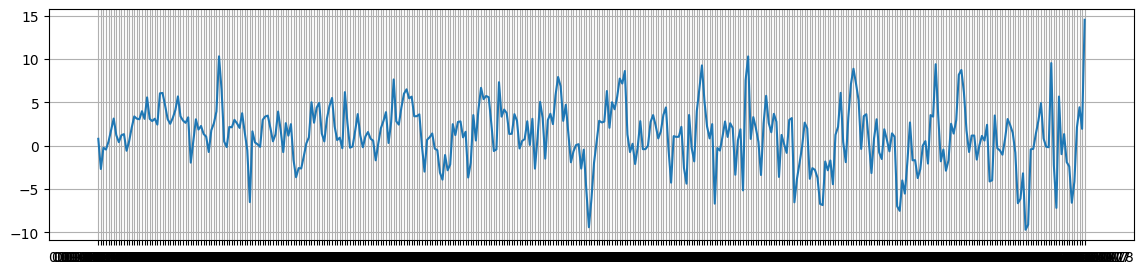

In [119]:
sdiff = df["IPG2211A2N"].diff(periods=12).dropna() # trying to remove seasonality
plt.figure(figsize=(14,3))
plt.grid()
plt.plot(sdiff)
plt.show()

In [121]:
# adf test 
sdiff_adf = adfuller(sdiff)
sdiff_adf[1]

8.812644938088811e-07

p value less then 0.05 thus we reject null hypothesis and hence series is stationary

In [122]:
# kpss test 
sdiff_kpss = kpss(sdiff)
sdiff_kpss[1]

0.02434563479144005

p-value is less then 0.05 thus er reject null hypo means series is not stationary

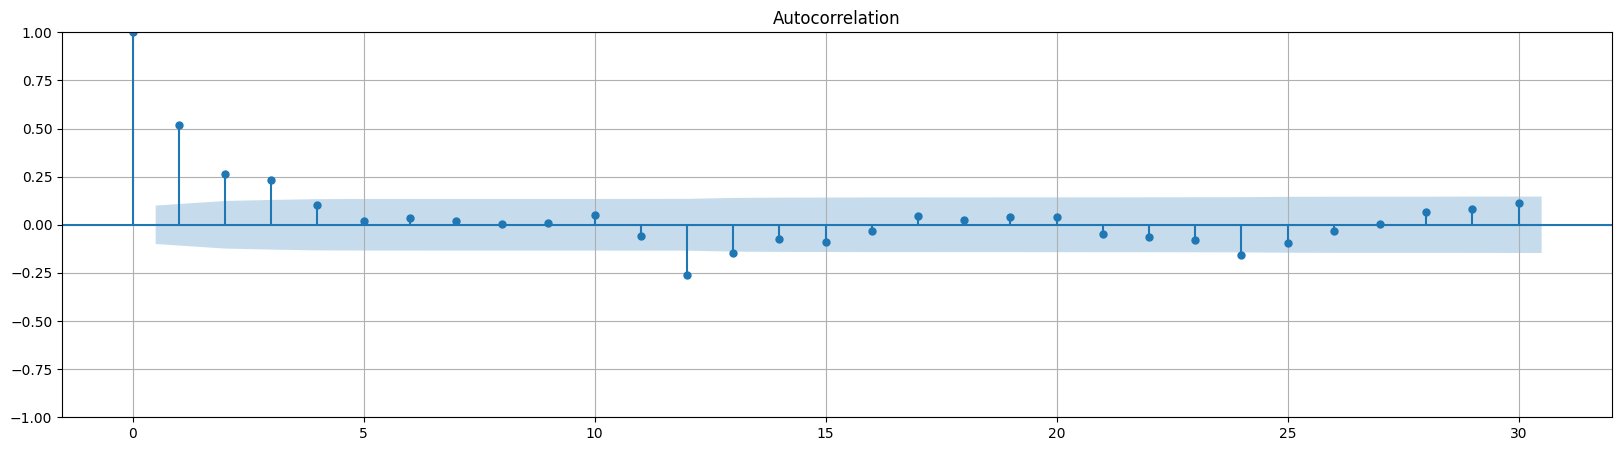

In [123]:
# acf plot of first order seasonal differencing
plt.figure(figsize=(20, 5))
plt.grid()
plot_acf(sdiff , ax=plt.gca(), lags =30 )
plt.show()

# Combination of Seasoanal and Non-seasonal differencing

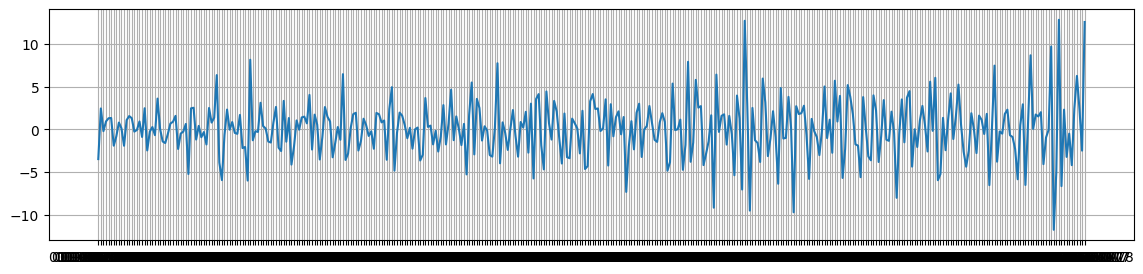

In [125]:
nsdiff = sdiff.diff().dropna() # non-seasonal differencing of seasonal differenced series
plt.figure(figsize=(14, 3))
plt.grid()
plt.plot(nsdiff)
plt.show()

In [127]:
# adf test of combined differencing 
nsdiff_adf = adfuller(nsdiff)
nsdiff_adf[1]

2.063925209077157e-12

p-value less then 0.05 we reject null hypo thus series is stationary 

In [128]:
# kpss test of combined differencing
nsdiff_kpss = kpss(nsdiff)
nsdiff_kpss[1]

/var/folders/8h/xtp_v7md6bs9195xxzbbf5d80000gn/T/ipykernel_1451/1238880943.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  nsdiff_kpss = kpss(nsdiff)


0.1

p-value is greater then 0.05 means we fail to reject null hypo thesis means series is stationary now

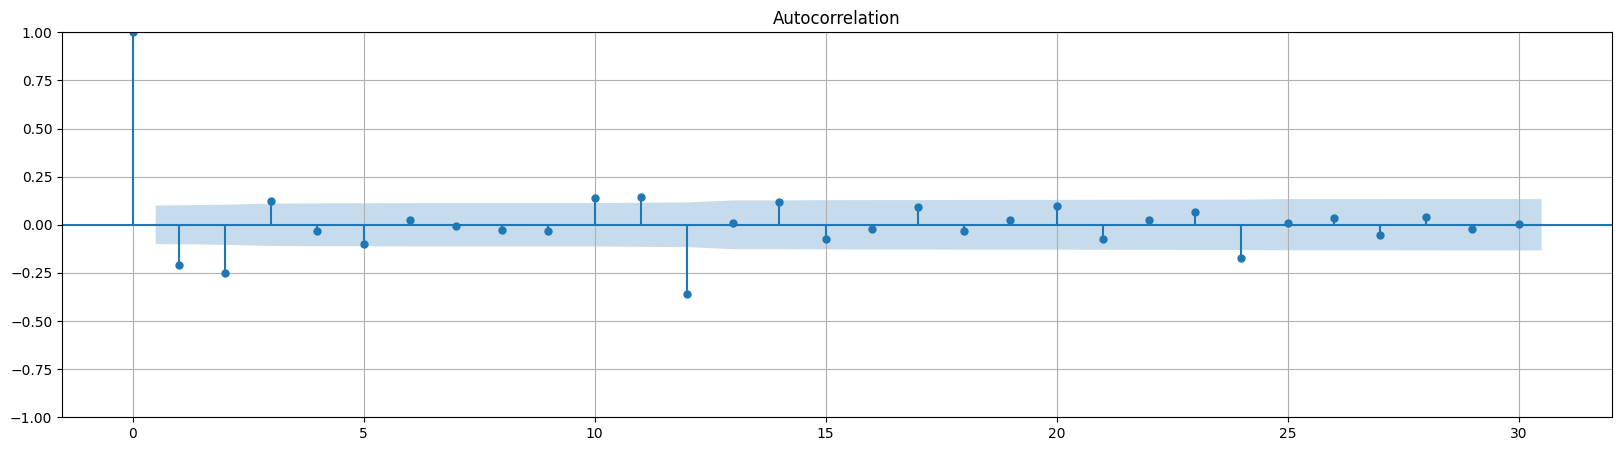

In [129]:
plt.figure(figsize=(20, 5))
plt.grid()
plot_acf(nsdiff , ax=plt.gca(), lags =30 )
plt.show()

# test is showing that series is stationary and hence will assume that series is stationary